<a href="https://colab.research.google.com/github/garviit25/Colaboratory/blob/master/Stock%20price%20predictor(reduced%20RMSE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [59]:
df = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2012-01-01', end='2020-05-08')
df 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,354.875000,343.575012,348.399994,353.274994,8598434.0,308.614227
2012-01-03,363.450012,355.174988,356.125000,362.325012,9366982.0,316.520142
2012-01-04,365.475006,356.674988,363.700012,358.075012,8476734.0,312.807434
2012-01-05,362.475006,347.049988,357.500000,349.750000,13239172.0,305.534882
2012-01-06,362.000000,348.325012,348.524994,358.774994,9406294.0,313.418945
...,...,...,...,...,...,...
2020-05-04,1465.000000,1417.449951,1440.000000,1435.199951,24438682.0,1435.199951
2020-05-05,1479.000000,1447.199951,1453.699951,1460.650024,20528490.0,1460.650024
2020-05-06,1484.949951,1445.500000,1464.000000,1460.750000,18510252.0,1460.750000


In [60]:
df.shape


(2051, 6)

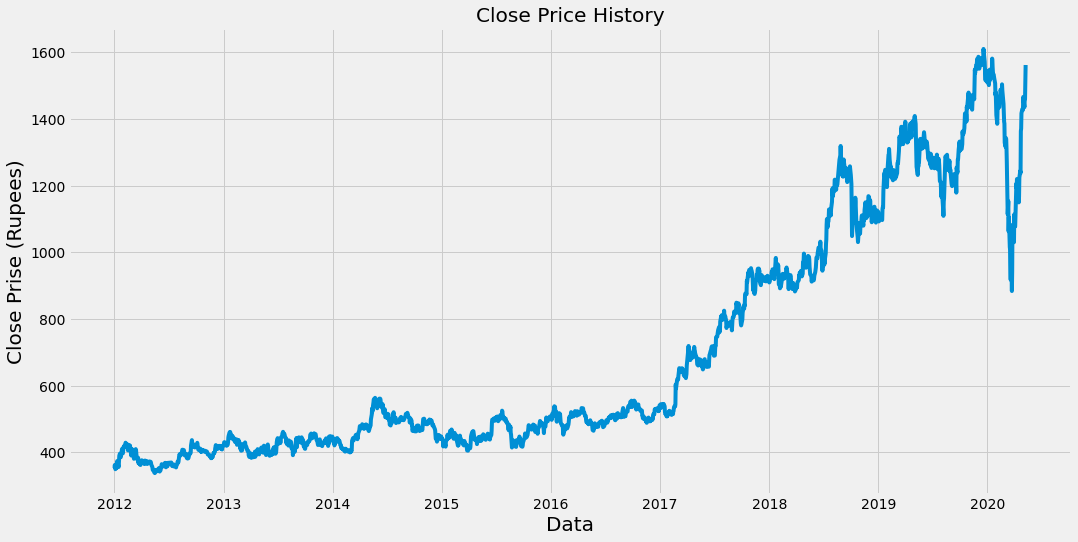

In [61]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=20)
plt.ylabel('Close Prise (Rupees)', fontsize=20)
plt.show()

In [62]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)
training_data_len


1641

In [63]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.01197029],
       [0.01908564],
       [0.01574418],
       ...,
       [0.88269522],
       [0.91901879],
       [0.96214333]])

In [64]:
#Create Training dataset
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)


[array([0.01197029, 0.01908564, 0.01574418, 0.00919885, 0.01629453,
       0.01185236, 0.02362609, 0.02836309, 0.02390127, 0.02189638,
       0.01448622, 0.02592579, 0.04074614, 0.04306551, 0.0458173 ,
       0.03752261, 0.04231859, 0.04514901, 0.05672618, 0.04664283,
       0.05542889, 0.06097179, 0.06020522, 0.06376288, 0.06167939,
       0.06621984, 0.07166446, 0.06987578, 0.06570879, 0.06806747,
       0.06792989, 0.06311426, 0.05360093, 0.05586133, 0.06582672,
       0.06183664, 0.06427392, 0.05654927, 0.04141443, 0.04733078,
       0.05686376, 0.05301126, 0.05424955, 0.04772389, 0.03948817,
       0.03368976, 0.03840711, 0.04813665, 0.05654927, 0.0544068 ,
       0.04738975, 0.0378371 , 0.0310559 , 0.03319837, 0.03614672,
       0.02368504, 0.02671201, 0.02122808, 0.02160155, 0.0194984 ])]
[0.0190856396831508]
[array([0.01197029, 0.01908564, 0.01574418, 0.00919885, 0.01629453,
       0.01185236, 0.02362609, 0.02836309, 0.02390127, 0.02189638,
       0.01448622, 0.02592579, 0.0407

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [66]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1581, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1581/1581 [==============================] - 62s 39ms/step - loss: 9.8608e-04


In [0]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#convert the data to a numpy array

x_test = np.array(x_test)

In [0]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [73]:
#get the models predicted price of values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[1255.4131 ],
       [1266.9098 ],
       [1274.1388 ],
       [1275.1556 ],
       [1271.5212 ],
       [1266.8829 ],
       [1260.5077 ],
       [1257.2609 ],
       [1257.5499 ],
       [1257.5173 ],
       [1255.7258 ],
       [1254.6726 ],
       [1254.0612 ],
       [1251.0707 ],
       [1246.3322 ],
       [1240.422  ],
       [1235.067  ],
       [1231.8849 ],
       [1229.9939 ],
       [1231.0934 ],
       [1233.8901 ],
       [1237.8241 ],
       [1239.4335 ],
       [1237.1326 ],
       [1224.8092 ],
       [1201.2428 ],
       [1179.6775 ],
       [1158.7777 ],
       [1141.4907 ],
       [1126.3673 ],
       [1117.7014 ],
       [1114.5441 ],
       [1117.112  ],
       [1121.3804 ],
       [1121.4589 ],
       [1115.6365 ],
       [1106.3218 ],
       [1094.9384 ],
       [1081.9653 ],
       [1070.6636 ],
       [1065.3586 ],
       [1060.7974 ],
       [1057.6904 ],
       [1055.1628 ],
       [1054.9904 ],
       [1057.5441 ],
       [1062.6847 ],
       [1069.

In [74]:
#Get the rms error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.06235455768864329

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


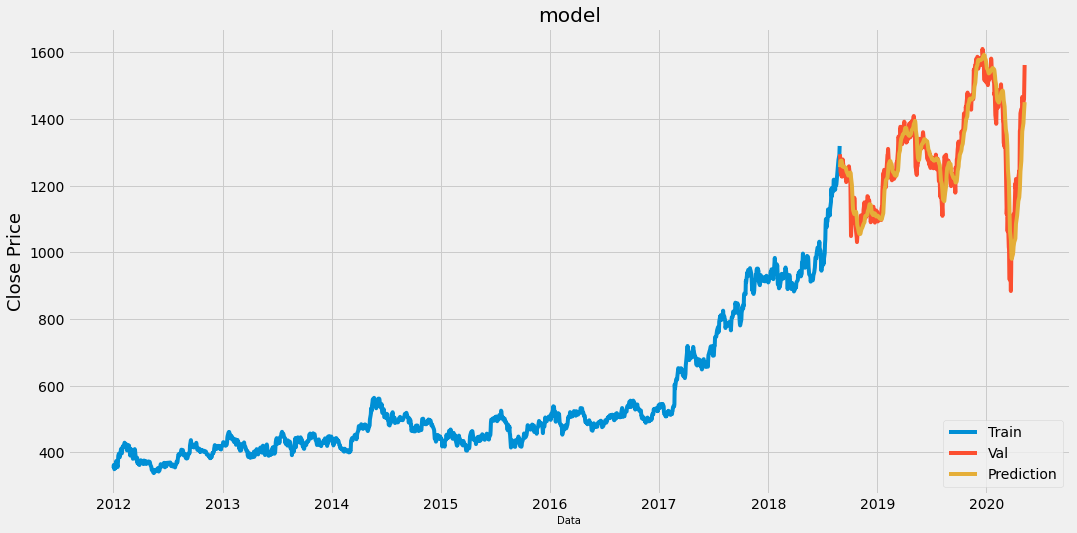

In [75]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualise the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Data',fontsize=10)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()


In [76]:
#Show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-08-29,1294.199951,1255.413086
2018-08-30,1274.449951,1266.909790
2018-08-31,1241.650024,1274.138794
2018-09-03,1229.150024,1275.155640
2018-09-04,1241.949951,1271.521240
...,...,...
2020-05-04,1435.199951,1387.629150
2020-05-05,1460.650024,1406.079224
2020-05-06,1460.750000,1422.218628


In [77]:
#Get the quote
reliance_quote = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2012-01-01', end='2020-05-08')
new_df = reliance_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1470.0643]]
